<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

# MIIIA Modelos Avanzados 1: Ejercicio 14 LSTM - 12 Jul 2020

                     Integrantes             Code
           - Luis Jorge Garcia Camargo        201920053
           - Jairo Alberto Pedraza Corredor   201924260
           - Nidia Marcela Ortiz Sandoval     199713132
           - Carlos Andres Paez Rojas         201924257


# Exercise 14

## Predict rating using LSTM


In [2]:
import pandas as pd

In [3]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [4]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

Primero eliminamos Caracteres especiales y dejamos todos los textos en minúsculas

In [6]:
#dejar todo en minúsculas
plots=plots.str.lower()

In [7]:
char=[',','?','.','"','-','(',')','\'',' n ']
for i in range(0,len(char)):
  plots=plots.str.replace(char[i],'')

In [8]:
plots[:50]
#plots.tail()

3107     most is the story of a single father who takes...
900      a serial killer decides to teach the secrets o...
6724     in sweden   a female blackmailer with a disfig...
4704     in a friday afternoon in new york   the presid...
2582     in los angeles   the editor of a publishing ho...
9784     two drifters are passing through a western tow...
8804     two gay men on a date are murdered the night b...
3501     adult huw morgan is about to move away from th...
7145     bertram pincus is a man whose people skills le...
4067     roy munson was raised to be the best bowler in...
4584     four guys   one camera   and their experience ...
2471     dexter reed plans to have a nice relaxing summ...
6123     living in greenwich village   tepper is a pret...
5091     out in california  s san fernando valley   isa...
1472     j  d   cahill is the toughest u  s   marshal t...
11066    the wolf taylor worth is a handsome man that i...
914      mild mannered jack dawn has been secretly work.

Ahora instalamos la libreria nltk para realizar la eliminazación de palabras "basura" antes de hacer la codificación de los textos en palabras

In [9]:
!pip install nltk

In [10]:
#### listar las palabras
X=plots.tolist()
X1=X.copy()

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Eliminamos stop_words y reemplzamos sobre la misma matriz X

In [12]:
eng_stopwords = stopwords.words('english')
#eliminamos stopwords
for i in range(0,len(X)):
  word_tokens = nltk.word_tokenize(X[i])
  word_tokens = [each for each in word_tokens if each.lower() not in eng_stopwords and len(each.lower()) > 2]
  X[i] = ' '.join(word_tokens)

In [13]:
word_tokens #tokens de palabras sin stop_words

['tinker',
 'bell',
 'journey',
 'far',
 'north',
 'never',
 'land',
 'patch',
 'things',
 'friend',
 'terence',
 'restore',
 'pixie',
 'dust',
 'tree']

In [14]:
voc=set((''.join(X)).split())
list(voc)


['rhett',
 'reconstructive',
 'jennifer',
 'hewitt',
 'aspirant',
 'neverdentist',
 'markgillian',
 'homage',
 'unquittable',
 'monogamy',
 'gse',
 'synonymousoklahoma',
 'dislocation',
 'skirmishes',
 'slicer',
 'thranduil',
 'toomey',
 'lbj',
 'fiske',
 'liberate',
 'space',
 'césar',
 'constraints',
 'interchangeable',
 'marijuanalove',
 'sarandon',
 'developmentnew',
 'nva',
 'leavesfamily',
 'carvers',
 'dissolves',
 'difficultunderachieving',
 'rhapsody',
 'ameti',
 'herrera',
 'dispensary',
 'sorceressrichard',
 'rothbart',
 'faustian',
 'workerscamera',
 'clips',
 'dwindling',
 'gained',
 'melina',
 'difficulties',
 'fellow',
 'zira',
 'shoplifting',
 'ninayear',
 'socializing',
 'wyman',
 'subsequently',
 'lifemary',
 'humiliating',
 'dossier',
 'quail',
 'mail',
 'teetotaler',
 'sessions',
 'cruelest',
 'excluding',
 'scaramanga',
 'series',
 'bracero',
 'elrod',
 'franco',
 'collecting',
 'murdoch',
 'flashback',
 'cough',
 'coats',
 'metalspartacus',
 'eichelberger',
 'chee

Ahora le damos una codificación a cada palabra de mi input X

In [15]:
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}
vocabulary

{'rhett': 1,
 'reconstructive': 2,
 'jennifer': 3,
 'hewitt': 4,
 'aspirant': 5,
 'neverdentist': 6,
 'markgillian': 7,
 'homage': 8,
 'unquittable': 9,
 'monogamy': 10,
 'gse': 11,
 'synonymousoklahoma': 12,
 'dislocation': 13,
 'skirmishes': 14,
 'slicer': 15,
 'thranduil': 16,
 'toomey': 17,
 'lbj': 18,
 'fiske': 19,
 'liberate': 20,
 'space': 21,
 'césar': 22,
 'constraints': 23,
 'interchangeable': 24,
 'marijuanalove': 25,
 'sarandon': 26,
 'developmentnew': 27,
 'nva': 28,
 'leavesfamily': 29,
 'carvers': 30,
 'dissolves': 31,
 'difficultunderachieving': 32,
 'rhapsody': 33,
 'ameti': 34,
 'herrera': 35,
 'dispensary': 36,
 'sorceressrichard': 37,
 'rothbart': 38,
 'faustian': 39,
 'workerscamera': 40,
 'clips': 41,
 'dwindling': 42,
 'gained': 43,
 'melina': 44,
 'difficulties': 45,
 'fellow': 46,
 'zira': 47,
 'shoplifting': 48,
 'ninayear': 49,
 'socializing': 50,
 'wyman': 51,
 'subsequently': 52,
 'lifemary': 53,
 'humiliating': 54,
 'dossier': 55,
 'quail': 56,
 'mail': 57

Realizamos un análisis descriptivo para revisar cual es la longitud máxima de paralabras en los textos. De este análisis nos damos cuenta que el 99% de los textos(observaciones) tienen una longitud máxima de 202 palabras, entonces procederemos a codificar nuestros textos con esta longitud de 202 para que la matriz de entrada no quede tan pesada 

In [16]:
X=[x.split() for x in X]
len_X2=pd.Series([len(x) for x in X])
len_X2.describe(percentiles=[.8,.9,.95,.99])

count    7895.000000
mean       67.366941
std        43.770016
min         0.000000
50%        59.000000
80%        95.000000
90%       126.000000
95%       152.000000
99%       202.000000
max       814.000000
dtype: float64

Una vez eliminando las stopwords y solo tomando la longitud de cada texto que cubra el 99% de los textos, utilizamos una longitud máxima de 202 para codificar

In [17]:
# Max len
max_len_text = 202
X = [x[:max_len_text] for x in X]

In [18]:
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [19]:
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(X, maxlen=max_len_text)
X_pad

Using TensorFlow backend.


array([[    0,     0,     0, ...,  3805, 43079, 19464],
       [    0,     0,     0, ..., 34007, 22711, 20023],
       [    0,     0,     0, ..., 33978, 24377,  8571],
       ...,
       [    0,     0,     0, ..., 44388, 45566, 13525],
       [    0,     0,     0, ...,  9433, 27713, 43946],
       [    0,     0,     0, ...,  1612, 35951, 32044]], dtype=int32)

Esta es la matriz de entrada definitiva con las codificaciones de los textos por id de palabras, haciendo todo el tratamiento previo de limpieza de textos

In [20]:
X_pad.shape

(7895, 202)

In [21]:
y.shape

(7895,)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [22]:
!pip install livelossplot

In [23]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [24]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

**Prueba 1:** Para este caso utilizamos una función de activación TANH en la capa  LSCT con 32 unidades y un batch de 128. Con un Dropout=0.7 y una epochs=15

In [36]:
model_a = Sequential()
model_a.add(Embedding(len(vocabulary) + 1, 1000, input_length=max_len_text)) #capa embeding
model_a.add(LSTM(32,activation='tanh'))
model_a.add(Dropout(0.7))  #medida de regularizacion (reemplaza el 0.7 de los pesos por 0 y fuerza a la NN a aprender con la mitad)
model_a.add(Dense(1, activation='sigmoid'))
model_a.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_a.summary()   

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 202, 1000)         45721000  
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                132224    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 45,853,257
Trainable params: 45,853,257
Non-trainable params: 0
_________________________________________________________________


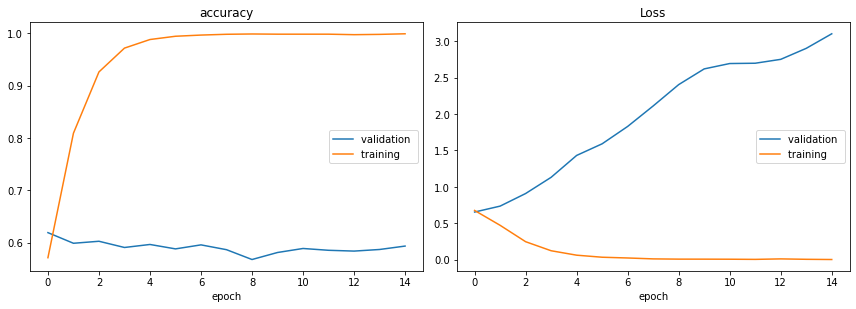

accuracy
	validation       	 (min:    0.568, max:    0.619, cur:    0.593)
	training         	 (min:    0.571, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.654, max:    3.101, cur:    3.101)
	training         	 (min:    0.002, max:    0.676, cur:    0.002)


In [37]:
model_a.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=15, verbose=1, #balancear que no todo sea del mismo tamaño
          callbacks=[PlotLossesKeras()])

Para este caso nos da un accuracy máximo de 61.9% y una pérdida máxima del 159%

**Prueba 2:** Para este caso utilizamos una función de activación RELU en la capa  LSCT con 32 unidades y un batch de 128. Con un Dropout=0.7 y una epochs=15

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len_text)) #capa embeding
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.7))  #medida de regularizacion (reemplaza el 0.5 de los pesos por 0 y fuerza a la NN a aprender con la mitad)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 202, 128)          5852288   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,872,929
Trainable params: 5,872,929
Non-trainable params: 0
_________________________________________________________________


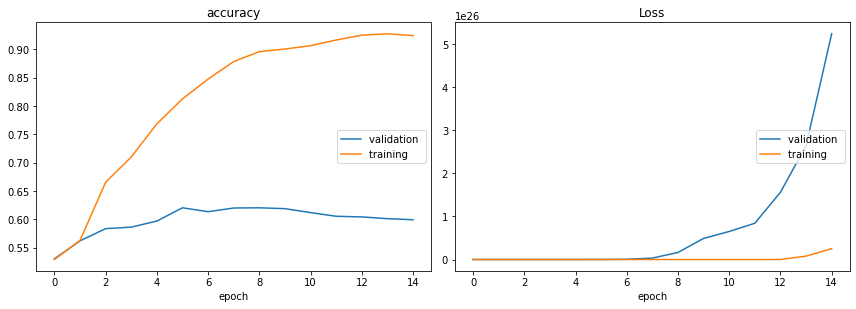

accuracy
	validation       	 (min:    0.530, max:    0.620, cur:    0.599)
	training         	 (min:    0.529, max:    0.928, cur:    0.924)
Loss
	validation       	 (min:    0.674, max: 524612261091887323096809472.000, cur: 524612261091887323096809472.000)
	training         	 (min:    0.691, max: 25127054328431018896261120.000, cur: 25127054328431018896261120.000)


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=15, verbose=1, #balancear que no todo sea del mismo tamaño
          callbacks=[PlotLossesKeras()])

Para este caso nos da un accuracy máximo de 62% y una pérdida máxima del 53%

**Prueba 2:** Para este caso, adicionamos otra capa densa y utilizamos una función de activación RELU en la capa LSTM con 15 unidades y un batch de 1000. Con un Dropout=0.8 y una epochs=15



In [ ]:
model2 = Sequential()
model2.add(Embedding(len(vocabulary) + 1, 1000, input_length=max_len_text)) #capa embeding
model2.add(LSTM(15,activation='relu'))
model2.add(Dense(15,activation='tanh'))
model2.add(Dropout(0.8))  #medida de regularizacion (reemplaza el 0.5 de los pesos por 0 y fuerza a la NN a aprender con la mitad)
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()        

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 202, 1000)         45721000  
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                60960     
_________________________________________________________________
dense_7 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 45,782,216
Trainable params: 45,782,216
Non-trainable params: 0
_________________________________________________________________


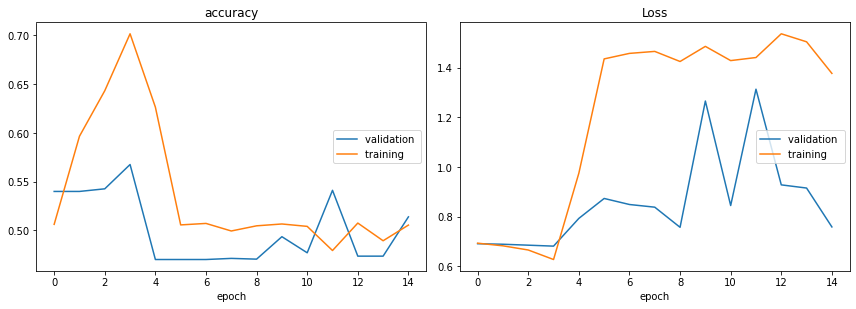

accuracy
	validation       	 (min:    0.470, max:    0.568, cur:    0.514)
	training         	 (min:    0.479, max:    0.702, cur:    0.505)
Loss
	validation       	 (min:    0.681, max:    1.313, cur:    0.758)
	training         	 (min:    0.627, max:    1.536, cur:    1.376)


In [ ]:
model2.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=1000, epochs=15, verbose=1, #balancear que no todo sea del mismo tamaño
          callbacks=[PlotLossesKeras()])

Con este ajuste de parámetros el performance de la red dismunuye, alcanzando unos niveles máximos de accuracy del 56.7%

**Conclusión:** Al realizar diferentes ajustes en los parámetros y utilizando variaciones en las Unidades de cada capa, probando diferentes funciones de activación e inclusive añadiendo una capa densa adicional. El mejor resultado que obtuvimos es en la Prueba 2, accuracy máximo de 63%, utilizando funciones de activación RELU y un parámetro de dropout de 0.7, con 32 unidades en las capas, este set de parámetros deba un mejor ajuste que utilizar funciones de activación tanh y adicionando capas. Por otra parte el ajuste de la red con las dos capas, aunque da un menor accuracy , las gráficas ajustan mejor.